In [48]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [49]:
#SPECIFY EACH PATH

In [50]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [51]:
#Set number of classes

In [52]:
NUM_CLASSES = 5

# Dataset reading

In [53]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [54]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [57]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [59]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [60]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test_filtered, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 604, in run_forever

  File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Program Files\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\MSI\AppData\Local\Temp\ipykernel_10640\2889966517.py", line 1, in <module>

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 15 which is outside the valid range of [0, 5).  Label values: 15 4 14 8 9 8 2 13 12 13 0 12 8 2 4 5 11 11 11 11 14 3 9 0 14 6 8 11 11 5 6 9 15 1 3 12 2 13 2 8 11 12 9 9 4 6 13 0 8 11 13 14 13 12 11 4 11 10 10 13 12 14 9 15 11 8 12 2 2 11 14 1 12 8 13 12 13 7 2 0 8 0 8 3 4 8 5 14 4 5 3 11 10 10 11 2 13 8 12 9 8 4 13 10 15 8 9 4 11 1 10 13 10 1 12 1 5 4 0 11 12 10 13 0 10 6 13 8
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_3265]

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.8509


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 97ms/step
[1.1520319e-11 4.6792811e-05 2.5451416e-04 9.8654473e-06 1.0903072e-24
 2.1872032e-01 6.1052695e-12 1.9250811e-08 1.5247644e-09 2.3629226e-12
 4.2968410e-11 5.1210104e-03 1.4332011e-01 2.1254814e-01 4.4250179e-15
 4.1997927e-01]
15


# Confusion matrix

50/50 [==============================] - 0s 984us/step


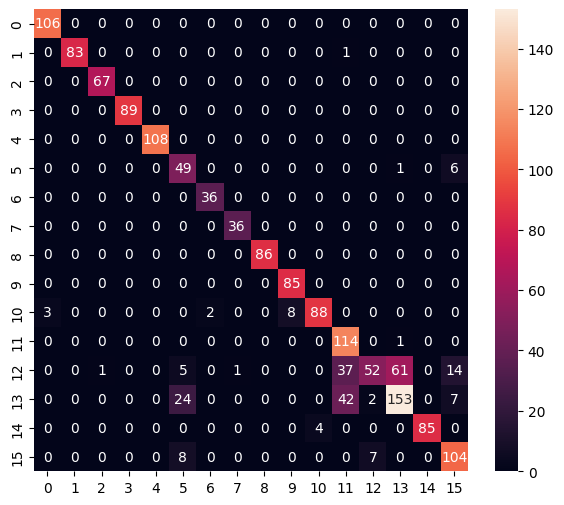

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       1.00      0.99      0.99        84
           2       0.99      1.00      0.99        67
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00       108
           5       0.57      0.88      0.69        56
           6       0.95      1.00      0.97        36
           7       0.97      1.00      0.99        36
           8       1.00      1.00      1.00        86
           9       0.91      1.00      0.96        85
          10       0.96      0.87      0.91       101
          11       0.59      0.99      0.74       115
          12       0.85      0.30      0.45       171
          13       0.71      0.67      0.69       228
          14       1.00      0.96      0.98        89
          15       0.79      0.87      0.83       119

    accuracy                           0.85      1576
   m

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MSI\AppData\Local\Temp\tmpwhdt11ko\assets


INFO:tensorflow:Assets written to: C:\Users\MSI\AppData\Local\Temp\tmpwhdt11ko\assets


7072

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1520281e-11 4.6792789e-05 2.5451454e-04 9.8654527e-06 1.0903034e-24
 2.1872044e-01 6.1052608e-12 1.9250820e-08 1.5247651e-09 2.3629189e-12
 4.2968264e-11 5.1210052e-03 1.4332005e-01 2.1254781e-01 4.4250030e-15
 4.1997948e-01]
15
